#  Neural Network (NN)

##  What is  Neural Network?
 Artificial Neural Networks, came and mostly went over the decades. Neural Networks are inspired by our understanding of the biology of our brains – all those interconnections between the neurons. But, unlike a biological brain where any neuron can connect to any other neuron within a certain physical distance, these artificial neural networks have discrete layers, connections, and directions of data propagation.


<img src="http://ufldl.stanford.edu/tutorial/images/Network3322.png">


Each Input Neuron is connected to each Output Neuron.The difference between a regular neural network and  MLPNN is that there maybe many hidden layers for a MLPNN which gives the  

Dealing with the back propogation and the fast matrix multiplication takes lot of time for which we use some of the frameworks which allows us to build MLPNN easily some of them are 

<img src="http://imgur.com/5pdRnhr.jpg">

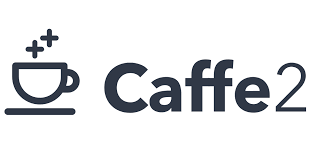

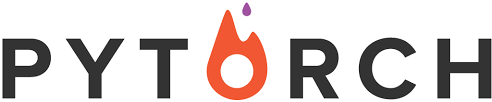


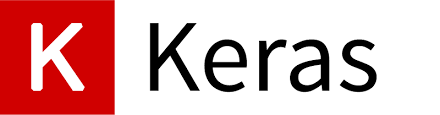

## Why keras?

#### User friendliness.
Keras is an API designed for human beings, not machines. It puts user experience front and center. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.

#### Modularity. 
A model is understood as a sequence or a graph of standalone, fully-configurable modules that can be plugged together with as little restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions, regularization schemes are all standalone modules that you can combine to create new models.

#### Easy extensibility
New modules are simple to add (as new classes and functions), and existing modules provide ample examples. To be able to easily create new modules allows for total expressiveness, making Keras suitable for advanced research.

#### Work with Python. 
No separate models configuration files in a declarative format. Models are described in Python code, which is compact, easier to debug, and allows for ease of extensibility.

Keras uses either **TensorFlow** or **Theano** for backend process for Tensor manipulation library.Keras is only concerned with modularity as well as the easy use of the framework

In [48]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow
from keras.callbacks import TensorBoard
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation,Input
from keras.wrappers.scikit_learn import KerasClassifier
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
data=pd.read_csv("bank_market.csv")


We encode the data using one-hot encoding .One hot encoding transforms categorical features to a format that works better with  algorithms.Mathematically, one hot encoding produces a balanced matrix, which is easy to understand during complex computations inside algorithms.

In [5]:
df_encoded = pd.get_dummies(data, drop_first=True,)
df_encoded.head()

,Cust_num,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,1,58,2143,5,261,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2,44,29,5,151,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,3,33,2,5,76,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,4,47,1506,5,92,1,-1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,5,33,1,5,198,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


After we encode the data,we do oversampaling as well as a tranformation process.

+ We oversample the data since there is an imbalance in the distribution of data in the independent variable

+ We transform the so that each and every variable are measurred in the same units or to make sure each and every features are of same scale



In [6]:
sm = SMOTE(random_state=42)
X=df_encoded[['Cust_num', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown']]
y=df_encoded[['y_yes']]
X_res, y = sm.fit_sample(X, y)
scaler = StandardScaler().fit(X)
X = scaler.transform(X_res)

In [7]:
df_encoded.shape


(45211, 44)

In keras the Deep layered architecture is built using layers .Each layered is stacked on top of each other.Stacking a layer on top of another can be done using the **.add()** function .We can specify the activation fucntion for each layer in the add function .The inputs can be of any dimensions it can also be specified by **None** if one doesn't know .But it is mandatory to know the input number of the first layer

In [8]:
model=Sequential()
model.add(Dense(60 ,input_dim=43, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Why use relu activation instead of traditional sigmoid function .Let us see in the below example
```python  

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
import numpy as np

np.random.seed(100)

model = Sequential()
model.add(Dense(2, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1, input_dim=2))
model.add(Activation('sigmoid'))
X = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
y = np.array([[0],[1],[1],[0]], "float32")
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y, nb_epoch=30000, batch_size=1,verbose=1)

print(model.predict_classes(X))```

The above is a simple model which is used to train the model to recognize XOR function the output for the above function is 
```python 
4/4 [==============================] - 0s - loss: 0.3481     
Epoch 29997/30000
4/4 [==============================] - 0s - loss: 0.3481     
Epoch 29998/30000
4/4 [==============================] - 0s - loss: 0.3481     
Epoch 29999/30000
4/4 [==============================] - 0s - loss: 0.3481     
Epoch 30000/30000
4/4 [==============================] - 0s

    [[0]
     [1]
     [0]
     [0]]
 ```
 
 Why is this happening for a simple problem ?
   This is due to **vanishing gradient** .Vanishing Gradient Problem is a difficulty found in training certain Artificial Neural Networks with gradient based methods (e.g Back Propagation). In particular, this problem makes it really hard to learn and tune the parameters of the earlier layers in the network. This problem becomes worse as the number of layers in the architecture increases.
We can avoid this problem by using activation functions which don't have this property of 'squashing' the input space into a small region. A popular choice was **Rectified Linear Unit** which maps xx to max(0,x)max(0,x).

We can know the property of the model by using **.summary()** 

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                2640      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 4,191
Trainable params: 4,191
Non-trainable params: 0
_________________________________________________________________


Next we fit the model with the data. It trains the model for a fixed number of epochs.

In [10]:
model.fit(X, y,nb_epoch=80)

Epoch 1/80
79844/79844 [==============================] - 6s - loss: 0.2770 - acc: 0.8885     
Epoch 2/80
79844/79844 [==============================] - 4s - loss: 0.2199 - acc: 0.9136     
Epoch 3/80
79844/79844 [==============================] - 5s - loss: 0.1979 - acc: 0.9225     
Epoch 4/80
79844/79844 [==============================] - 6s - loss: 0.1826 - acc: 0.9263     
Epoch 5/80
79844/79844 [==============================] - 6s - loss: 0.1722 - acc: 0.9296     
Epoch 6/80
79844/79844 [==============================] - 5s - loss: 0.1650 - acc: 0.9312     
Epoch 7/80
79844/79844 [==============================] - 6s - loss: 0.1587 - acc: 0.9343     
Epoch 8/80
79844/79844 [==============================] - 6s - loss: 0.1548 - acc: 0.9358     
Epoch 9/80
79844/79844 [==============================] - 6s - loss: 0.1506 - acc: 0.9363     
Epoch 10/80
79844/79844 [==============================] - 5s - loss: 0.1475 - acc: 0.9368     
Epoch 11/80
79844/79844 [========================

We then evaluate how well the model has done.**evaluate()** Returns the loss value & metrics values for the model in test mode.

In [11]:
# evaluate the model
scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

78848/79844 [============================>.] - ETA: 0s
acc: 96.49%


In deep layer there is a set of hyperparameters,activation functions,loss functions etc..We can manually go through each and 
every metric and find the optimal parameters for our model.But this time consuming as well as resource consuming which is why we use gridsearchcv to get the optimal parameters,it uses multithreading technique which allows fast computation

In [45]:
### takes lot of time(days) to run so if required to run change comment the if condition
if 1==0:
    def create_model():
        from keras.models import Sequential
        from keras.layers import Dense, Activation
        model.add(Dense(20 ,input_dim=16, activation='relu'))
        model.add(Dense(20, activation='relu'))
        model.add(Dense(15, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    model = KerasClassifier(build_fn=create_model)
    batch_size = [10, 20, 40, 60, 80, 100]
    epochs = [10, 50, 100]
    optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
    learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
    momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
    init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
    activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
    weight_constraint = [1, 2, 3, 4, 5]
    dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    neurons = [1, 5, 10, 15, 20, 25, 30]
    param_grid = dict(neurons=neurons,dropout_rate=dropout_rate,weight_constraint=weight_constraint,activation=activation,init_mode=init_mode,
                      momentum=momentum,learn_rate=learn_rate,optimizer=optimizer,epochs=epochs,batch_size=batch_size)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
    grid_result = grid.fit(X, y)

# Auto-encoders

<img src="http://ufldl.stanford.edu/tutorial/images/Autoencoder636.png">

What is an autoencoders?
    Autoencoders is a dimension reduction method used to bring a restructure the input.The restructed input is known as vectorized-input.Then again, autoencoders are not a true unsupervised learning technique (which would imply a different learning process altogether), they are a self-supervised technique, a specific instance of supervised learning where the targets are generated from the input data.

In [36]:
encoding_dim = 2
input = Input(shape=(43,))
x_train,y_train,x_test,y_test=train_test_split(X,y)

## Autoencoders with a single fully-connected neural layer as encoder and as decoder:

In [40]:
encoded = Dense(128, activation='relu')(input)
encoded = Dense(64, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

# decoder layers
decoded = Dense(64, activation='relu')(encoder_output)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(1, activation='sigmoid')(decoded)

# construct the autoencoder model
autoencoder = Model(input=input, output=decoded)

# construct the encoder model for plotting
encoder = Model(input=input, output=encoder_output)

# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 43)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 128)               5632      
_________________________________________________________________
dense_56 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 130       
_________________________________________________________________
dense_58 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_59 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 129       
Total para

The above gives a structured how the layers are stacked .Next we fit the model to the model

In [42]:
autoencoder.fit(X, y, epochs=50,
                batch_size=256,
                shuffle=True,callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
79844/79844 [==============================] - 1s - loss: 0.0208     
Epoch 2/50
79844/79844 [==============================] - 1s - loss: 0.0208     
Epoch 3/50
79844/79844 [==============================] - 1s - loss: 0.0208     
Epoch 4/50
79844/79844 [==============================] - 1s - loss: 0.0204     
Epoch 5/50
79844/79844 [==============================] - 1s - loss: 0.0206     
Epoch 6/50
79844/79844 [==============================] - 1s - loss: 0.0204     
Epoch 7/50
79844/79844 [==============================] - 2s - loss: 0.0197     
Epoch 8/50
79844/79844 [==============================] - 2s - loss: 0.0199     
Epoch 9/50
79844/79844 [==============================] - 1s - loss: 0.0198     
Epoch 10/50
79844/79844 [==============================] - 1s - loss: 0.0196     
Epoch 11/50
79844/79844 [==============================] - 1s - loss: 0.0189     
Epoch 12/50
79844/79844 [==============================] - 1s - loss: 0.0191     
Epoch 13/50
79844/79844 [

It is evident that loss function is reducing for every epoch it is running for as shown in the below diagram

<img src="http://i.imgur.com/9oHXsLG.png">


# END
